# Test using multitaper to get the displacement spectrum of a velocity time series

In [14]:
# Import modules

from os.path import join
from matplotlib.pyplot import subplots

from utils_basic import ROOTDIR, DISPLACEMENT_UNIT, VELOCITY_UNIT
from utils_cc import get_timewin_from_template_name
from utils_preproc import read_and_process_windowed_waveforms
from utils_snuffler import read_normal_markers
from utils_spec import vel2disp, get_vel_psd_mt, get_disp_psd_mt

In [15]:
# Inputs
## Time windows and stations
station = "B04"
evname = "BeatB16-08-06-34"
component = "Z"

length_twin = 0.4

center = 0.05

## Parameters for the multitaper analysis
nw = 2

## Filtering paramgters
freqmin_filt = 10.0
freqmax_filt = 450.0

## Plotting parameters
linewidth_wf = 1.0
linewidth_psd = 1.5

freqmin_plot = 10.0
freqmax_plot = 450.0

## Scale factors for plotting the PSDs
scale_wf = 1.05
scale_psd = 3.0

psdmin = 1e-2

fontsize_title = 15
fontsize_annot = 15

In [16]:
# Read the snuffler pick file
timewin = get_timewin_from_template_name(evname)
pickdf = read_normal_markers(join(ROOTDIR, timewin, f"xpicks_{evname}.dat"))

In [17]:
# Read and process the data
begin = center-length_twin/2
end = center+length_twin/2

stream = read_and_process_windowed_waveforms(pickdf, freqmin_filt, freqmax_filt, begin=begin, end=end, stations=[station])

B04


In [18]:
# Compute the PSDs

## Get the waveforms
trace = stream.select(station=station, component=component)[0]
vel = trace.data
samprat = trace.stats.sampling_rate
sampint = trace.stats.delta

disp = vel2disp(vel)

## Get the PSDs
_, psd_vel = get_vel_psd_mt(vel)
freqax, psd_disp = get_disp_psd_mt(vel)

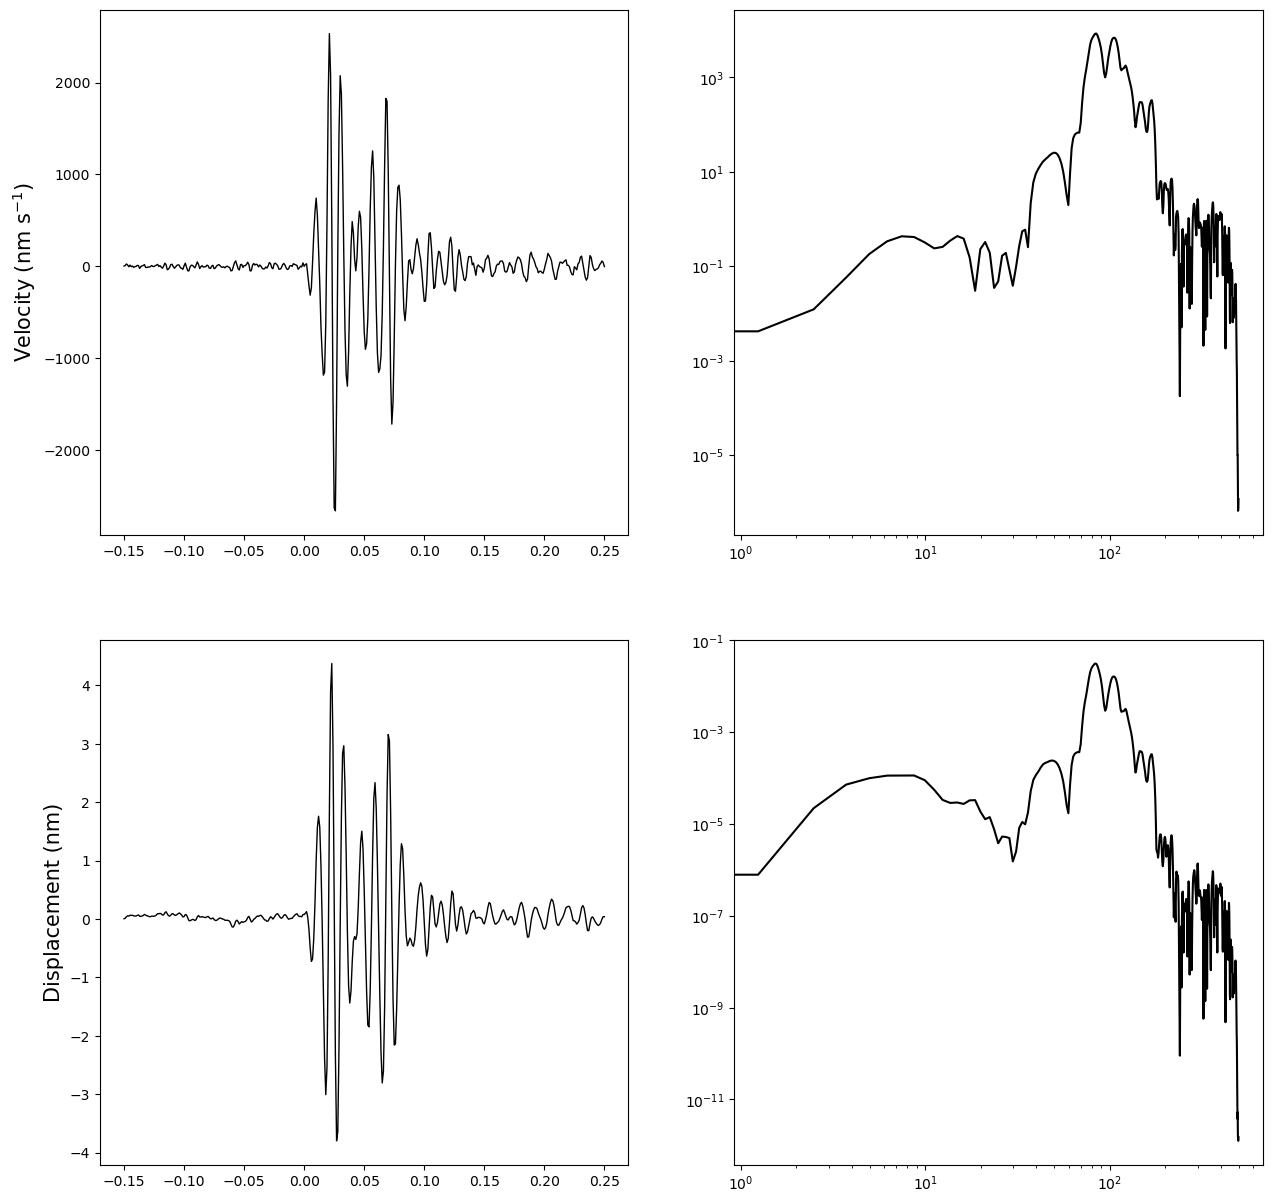

In [19]:
# Plot the waveforms and the PSDs
fig, ax = subplots(2, 2, figsize=(15, 15))

## Plot the waveforms
timeax  = trace.times()+begin

### Velocity
if component == "Z":
    ax[0, 0].plot(timeax, vel, linewidth=linewidth_wf, color="black")
elif component == "1":
    ax[0, 0].plot(timeax, vel, linewidth=linewidth_wf, color="forestgreen")
elif component == "2":
    ax[0, 0].plot(timeax, vel, linewidth=linewidth_wf, color="royalblue")

ax[0, 0].set_ylabel(f"Velocity ({VELOCITY_UNIT})", fontsize=fontsize_annot)

### Displacement
if component == "Z":
    ax[1, 0].plot(timeax, disp, linewidth=linewidth_wf, color="black")
elif component == "1":
    ax[1, 0].plot(timeax, disp, linewidth=linewidth_wf, color="forestgreen")
elif component == "2":
    ax[1, 0].plot(timeax, disp, linewidth=linewidth_wf, color="royalblue")

ax[1, 0].set_ylabel(f"Displacement ({DISPLACEMENT_UNIT})", fontsize=fontsize_annot)

## Plot the PSDs
### Velocity
if component == "Z":
    ax[0, 1].loglog(freqax, psd_vel, linewidth=linewidth_psd, color="black")
elif component == "1":
    ax[0, 1].loglog(freqax, psd_vel, linewidth=linewidth_psd, color="forestgreen")
elif component == "2":
    ax[0, 1].loglog(freqax, psd_vel, linewidth=linewidth_psd, color="royalblue")

### Displacement
if component == "Z":
    ax[1, 1].loglog(freqax, psd_disp, linewidth=linewidth_psd, color="black")
elif component == "1":
    ax[1, 1].loglog(freqax, psd_disp, linewidth=linewidth_psd, color="forestgreen")
elif component == "2":
    ax[1, 1].loglog(freqax, psd_disp, linewidth=linewidth_psd, color="royalblue")